In [1]:
# import python modules
import plumed
import matplotlib.pyplot as plt
import MDAnalysis as mda
import nglview as nv
import numpy as np
from nglview.datafiles import PDB, XTC


## Exercise 1

In [2]:
# import COLVAR file as pandas dataset
data=plumed.read_as_pandas("./Ex1/nliquid.dat");
# print pandas dataset
data.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Applications/anaconda3/envs/plumed-masterclass-2022/lib/libplumedKernel.dylib" +++


Index(['time', 'lq.morethan'], dtype='object')

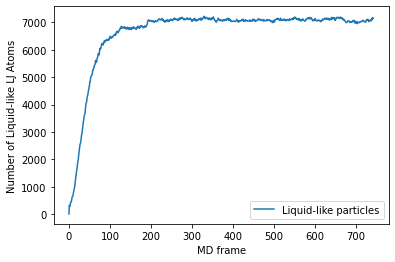

In [3]:
# plot time serie of gyration radius (r) and distance (d)
plt.plot(data['time'],data['lq.morethan'], label="Liquid-like particles")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Number of Liquid-like LJ Atoms")
plt.legend();

### Do it on your own: 

Edit the plumed file adding the line: 

```
bulk: COORDINATIONNUMBER SPECIES=1-10000 SWITCH={CUBIC D_0=0.45  D_MAX=0.55} MORE_THAN={RATIONAL R_0=8.0 D_MAX=12.0}

surface: COORDINATIONNUMBER SPECIES=1-10000 SWITCH={CUBIC D_0=0.45  D_MAX=0.55} BETWEEN={GAUSSIAN LOWER=5.0 UPPER=8.0}

ratio: MATHEVAL ARG=bulk.morethan,surface.between FUNC=y/x PERIODIC=NO 

PRINT ARG=bulk.morethan,surface.between,ratio STRIDE=1 FILE=nliquid_ToYO.dat
```

In [4]:
# import COLVAR file as pandas dataset
data=plumed.read_as_pandas("./Ex1/nliquid_ToYO.dat");
# print pandas dataset
data.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Applications/anaconda3/envs/plumed-masterclass-2022/lib/libplumedKernel.dylib" +++


Index(['time', 'bulk.morethan', 'surface.between', 'ratio'], dtype='object')

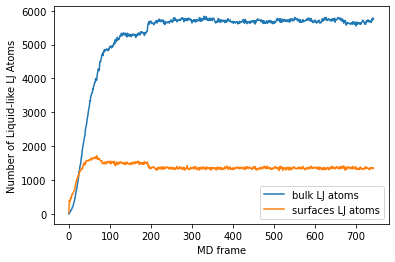

In [5]:
# plot time serie of gyration radius (r) and distance (d)
plt.plot(data['time'],data['bulk.morethan'], label="bulk LJ atoms")
plt.plot(data['time'],data['surface.between'], label="surfaces LJ atoms")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Number of Liquid-like LJ Atoms")
plt.legend();

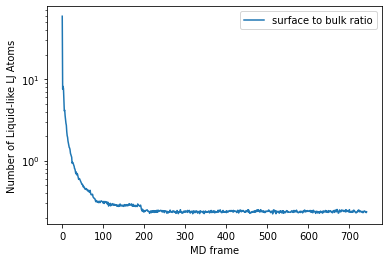

In [6]:
# plot time serie of gyration radius (r) and distance (d)
plt.yscale("log")  
plt.plot(data['time'],data['ratio'], label="surface to bulk ratio")

# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Number of Liquid-like LJ Atoms")
plt.legend();

## Exercise 2

In [7]:
# import COLVAR file as pandas dataset
data=plumed.read_as_pandas("./Ex2/clusters.dat");
# print pandas dataset
data.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Applications/anaconda3/envs/plumed-masterclass-2022/lib/libplumedKernel.dylib" +++


Index(['time', 'lq.morethan', 'nclust.morethan', 'nclust20.morethan',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4'],
      dtype='object')

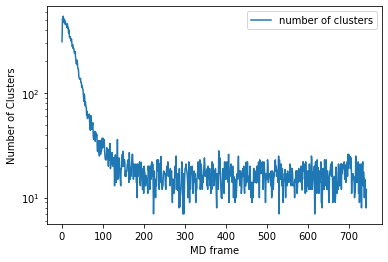

In [8]:
# plot time serie of gyration radius (r) and distance (d)
plt.yscale("log") 
plt.plot(data['time'],data['nclust.morethan'], label="number of clusters")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Number of Clusters")
plt.legend();

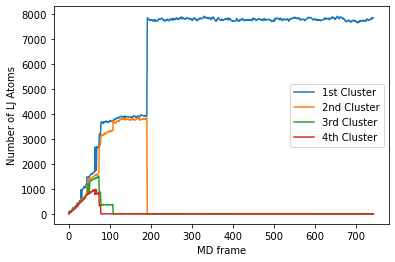

In [9]:
# plot time serie of gyration radius (r) and distance (d)
plt.plot(data['time'],data['cluster_1'], label="1st Cluster")
plt.plot(data['time'],data['cluster_2'], label="2nd Cluster")
plt.plot(data['time'],data['cluster_3'], label="3rd Cluster")
plt.plot(data['time'],data['cluster_4'], label="4th Cluster")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Number of LJ Atoms")
plt.legend();

### Do it on your own

Edit the plumed file to include a new criterion for the formation of clusters. 

```
# Identify liquid-like atoms
lq: COORDINATIONNUMBER SPECIES=1-10000 SWITCH={CUBIC D_0=0.45  D_MAX=0.55} MORE_THAN={RATIONAL R_0=5.0 D_MAX=10.0}

# Define a contact matrix & perfom DFS clustering 
cm: CONTACT_MATRIX ATOMS=lq  SWITCH={CUBIC D_0=0.45  D_MAX=0.55}                      
dfs: DFSCLUSTERING MATRIX=cm       

# Compute the size of the four largest clusters
cluster_1: CLUSTER_NATOMS CLUSTERS=dfs CLUSTER=1 
cluster_2: CLUSTER_NATOMS CLUSTERS=dfs CLUSTER=2
cluster_3: CLUSTER_NATOMS CLUSTERS=dfs CLUSTER=3
cluster_4: CLUSTER_NATOMS CLUSTERS=dfs CLUSTER=4

# Compute the number of clusters  
nclust: CLUSTER_DISTRIBUTION CLUSTERS=dfs MORE_THAN={GAUSSIAN D_0=4.95 R_0=0.01 D_MAX=4.99}

# Compute the number of clusters
nclust20: CLUSTER_DISTRIBUTION CLUSTERS=dfs MORE_THAN={GAUSSIAN D_0=19.95 R_0=0.01 D_MAX=19.99}


# PRINT to file
PRINT ARG=lq.morethan,nclust.*,nclust20.*,cluster_1,cluster_2,cluster_3,cluster_4 STRIDE=1  FILE=clusters.dat

FLUSH STRIDE=1
```




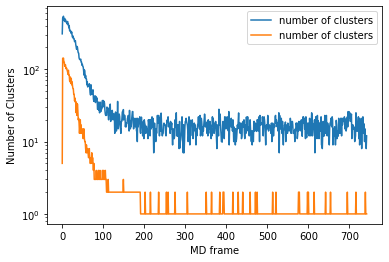

In [10]:
# plot time serie of gyration radius (r) and distance (d)
plt.yscale("log") 
plt.plot(data['time'],data['nclust.morethan'], label="number of clusters")
plt.plot(data['time'],data['nclust20.morethan'], label="number of clusters")
# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("Number of Clusters")
plt.legend();

## Exercise 3

In [11]:
# import COLVAR file as pandas dataset
data=plumed.read_as_pandas("./Ex3/CMUMD_log");
# print pandas dataset
data.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Applications/anaconda3/envs/plumed-masterclass-2022/lib/libplumedKernel.dylib" +++


Index(['time', 'left', 'right', 'rleft.bias', 'rright.bias'], dtype='object')

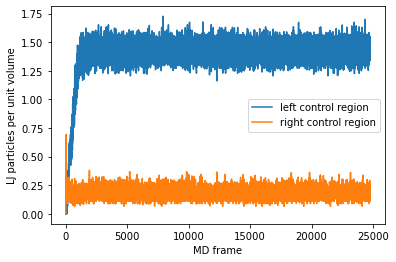

In [12]:
# plot 
plt.plot(data['time'],data['left'], label="left control region")
plt.plot(data['time'],data['right'], label="right control region")

# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("LJ particles per unit volume")
plt.legend();

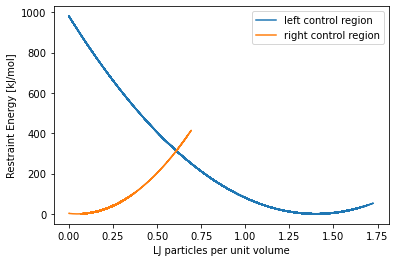

In [13]:
# plot 
plt.plot(data['left'],data['rleft.bias'], label="left control region")
plt.plot(data['right'],data['rright.bias'], label="right control region")

# x-y axis labels
plt.xlabel("LJ particles per unit volume")
plt.ylabel("Restraint Energy [kJ/mol]")
plt.legend();

### Do it on your own

Definition of the left and right controlled regions: 

```
REF: FIXEDATOM AT=0,0,14 

dens: DENSITY SPECIES=1-1000 

grid: MULTICOLVARDENS ORIGIN=REF DATA=dens DIR=z NBINS=100 BANDWIDTH=0.05 STRIDE=1 

DUMPGRID GRID=grid STRIDE=500 FILE=density_profile 
```


In [57]:
lz=28.00000/2
lx=4
ly=4.

boundaries=np.array([-0.75,-0.5,0.5,0.75])


+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Applications/anaconda3/envs/plumed-masterclass-2022/lib/libplumedKernel.dylib" +++


Index(['z', 'dens.dens', 'ddens.dens_z'], dtype='object')

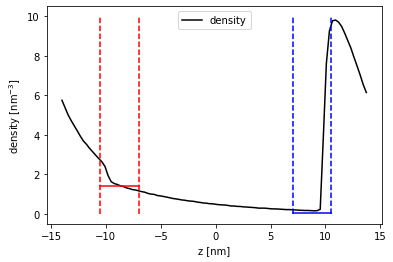

In [64]:
# import COLVAR file as pandas dataset
data=plumed.read_as_pandas("./Ex3/density_profile");
# print pandas dataset
data.columns

plt.plot((data['z']),data['dens.dens']/(lx*ly), 'k-', label="density")

plt.plot(np.array([lz*boundaries[0],lz*boundaries[0]]),[0,10],'r--')
plt.plot(np.array([lz*boundaries[1],lz*boundaries[1]]),[0,10],'r--')
plt.plot(np.array([lz*boundaries[2],lz*boundaries[2]]),[0,10],'b--')
plt.plot(np.array([lz*boundaries[3],lz*boundaries[3]]),[0,10],'b--')

plt.plot(np.array([lz*boundaries[0],lz*boundaries[1]]),[1.4,1.4],'r-')
plt.plot(np.array([lz*boundaries[2],lz*boundaries[3]]),[0.05,0.05],'b-')
                   
# x-y axis labels
plt.xlabel("z [nm]")
plt.ylabel("density [nm$^{-3}$]")
plt.legend();

## Exercise 4

In [16]:
# import COLVAR file as pandas dataset
data=plumed.read_as_pandas("./Ex4/CMUMD_log");
# print pandas dataset
data.columns

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/Applications/anaconda3/envs/plumed-masterclass-2022/lib/libplumedKernel.dylib" +++


Index(['time', 'left', 'right', 'rleft.bias', 'rright.bias'], dtype='object')

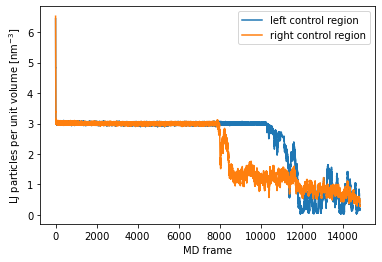

In [17]:
# plot time serie of gyration radius (r) and distance (d)
plt.plot(data['time'],data['left'], label="left control region")
plt.plot(data['time'],data['right'], label="right control region")

# x-y axis labels
plt.xlabel("MD frame")
plt.ylabel("LJ particles per unit volume [nm$^{-3}$]")
plt.legend();

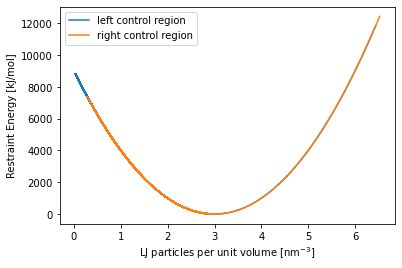

In [18]:
# plot time serie of gyration radius (r) and distance (d)
plt.plot(data['left'],data['rleft.bias'], label="left control region")
plt.plot(data['right'],data['rright.bias'], label="right control region")

# x-y axis labels
plt.xlabel("LJ particles per unit volume [nm$^{-3}]$")
plt.ylabel("Restraint Energy [kJ/mol]")
plt.legend();